# Import library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.renderers.default = "colab"
import missingno as mn
#import plotly.figure_factory as ff
#from plotly.figure_factory import create_scatterplotmatrix
#from plotly.offline import init_notebook_mode as iplot
from sklearn.cluster import KMeans # for modelling
from sklearn.metrics import silhouette_score # for evaluate k value
from sklearn.preprocessing import StandardScaler # for scaling 
from sklearn.decomposition import PCA

# Import dataset

In [ ]:
df = pd.read_csv('Data_Negara_HELP.csv')
df

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [ ]:
#data cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
# check column & row
df.columns
df.index

RangeIndex(start=0, stop=167, step=1)

In [ ]:
# check duplicates from county column
country = df[['Negara']]
country.loc[country.duplicated()]

,Negara


In [ ]:
# check statistic data
df.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# EDA

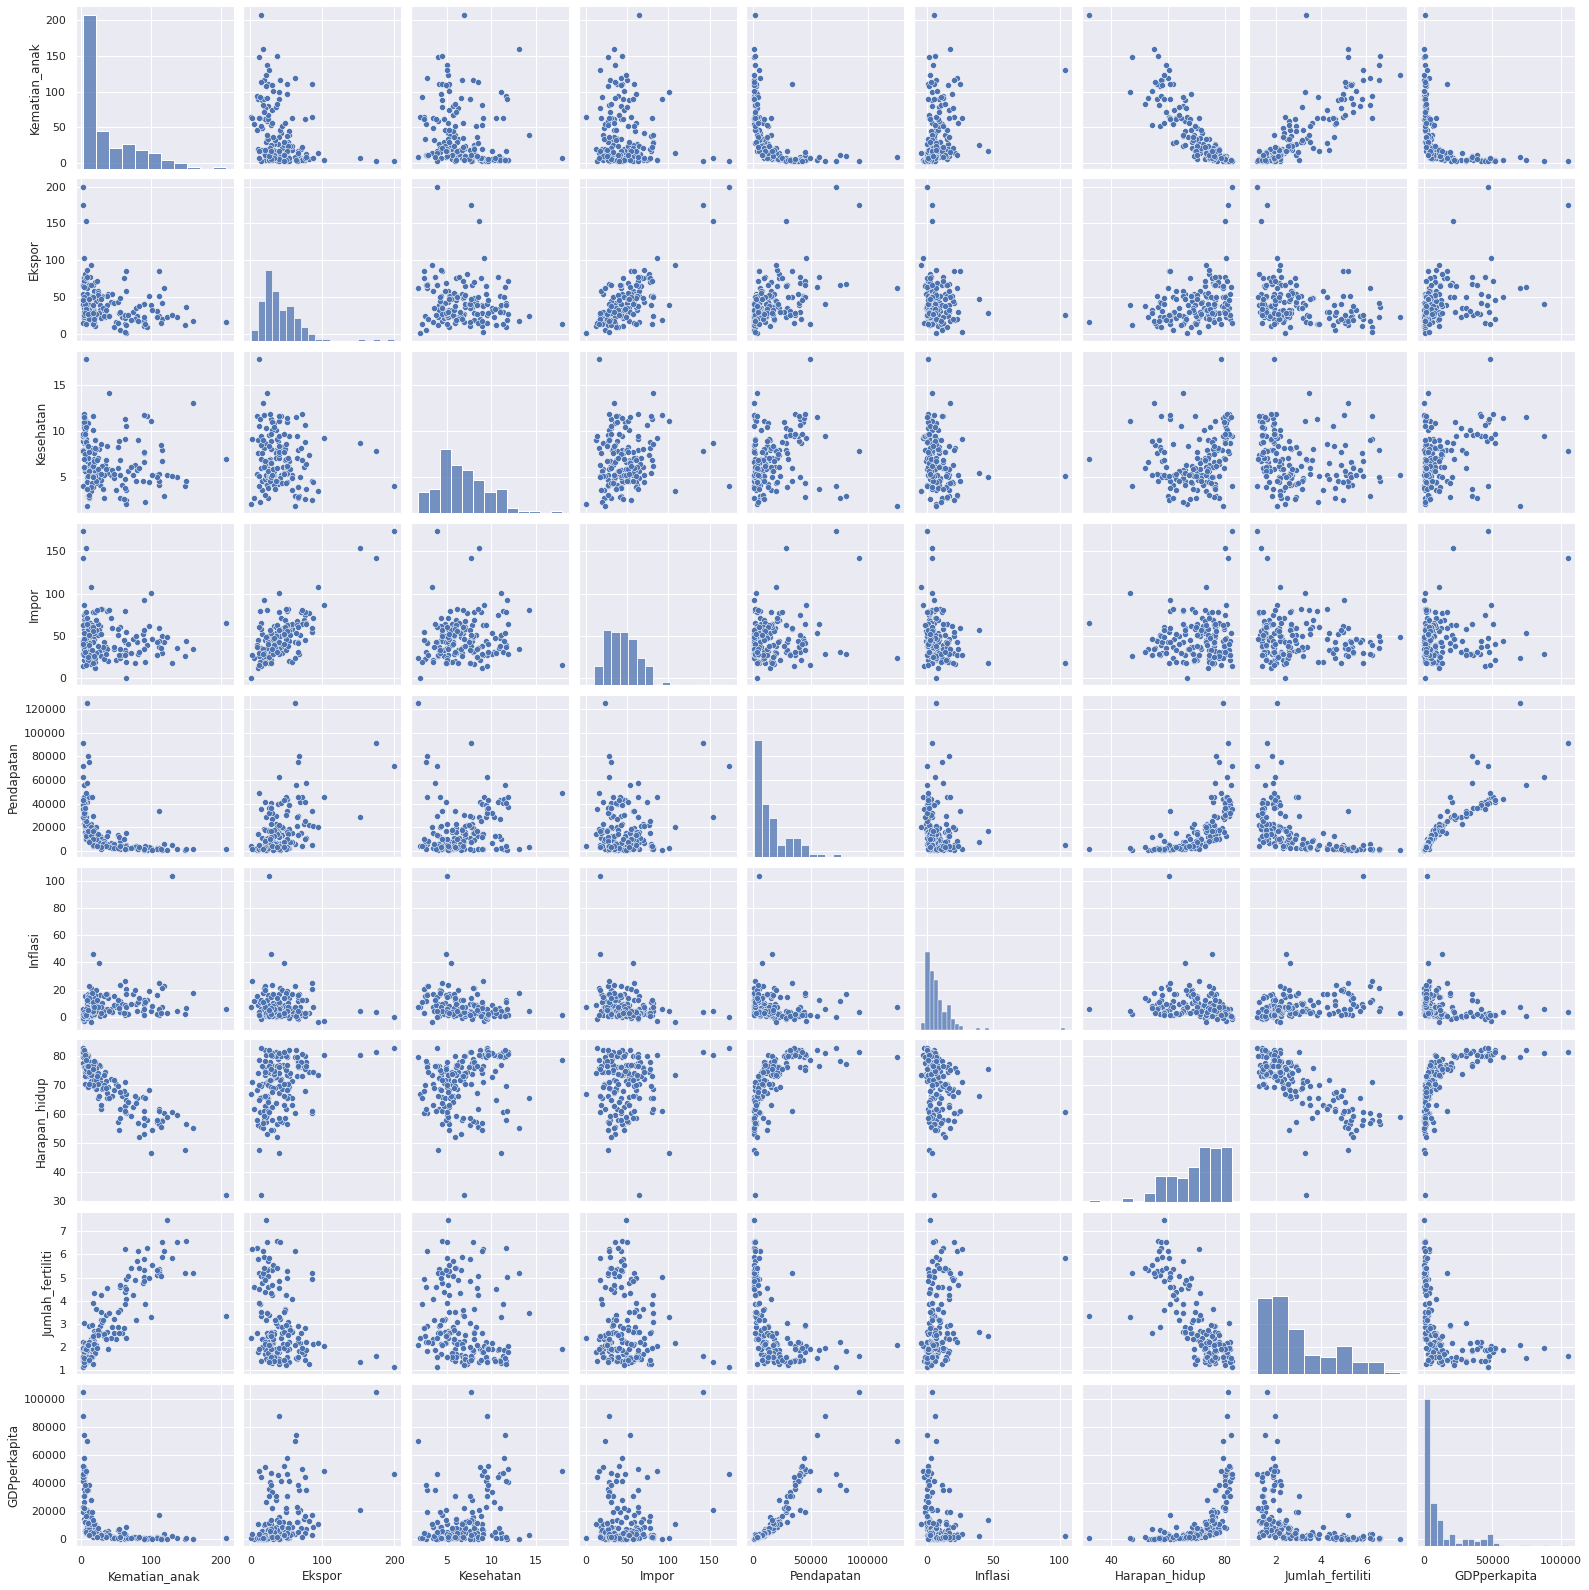

In [ ]:
# Multivariate analysis using heatmap
sns.pairplot(df)

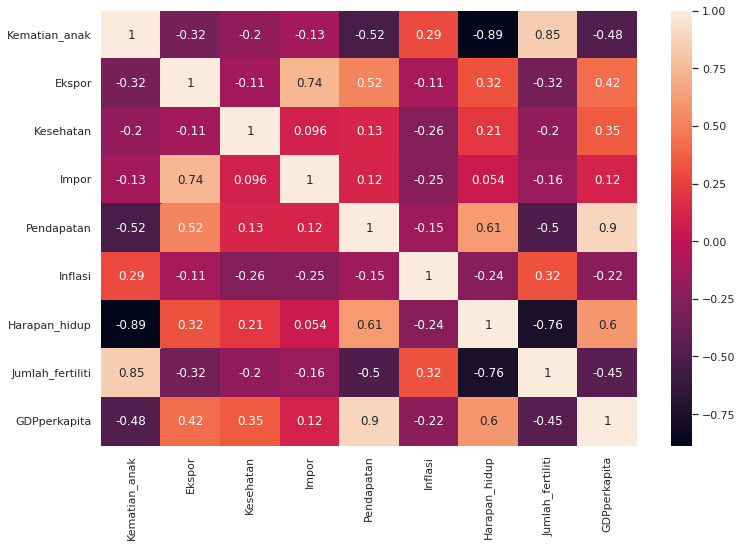

In [ ]:
fig,ax = plt.subplots(figsize=(12,8))
heatmap = sns.heatmap(df.corr(), annot=True)

*   variable kematian_anak dan harapan_hidup memiliki korelasi yang tinggi yaitu -0.89
*   variabel kematian_anak dan jumlah_fertiliti memiliki korelasi yang tinggi yaitu 0.85
*  variabel harapan_hidup dan jumlah_fertiliti memiliki korelasi yang tinggi
yaitu 0.76
*   vairabel GDPperkapita dan Harapan_hidup juga memiliki korelasi yang cukup tinggi yaitu 0.6











In [ ]:
px.scatter(data_frame= df, x='GDPperkapita', y='Kematian_anak',color='Negara')

In [ ]:
px.scatter(data_frame= df, x='GDPperkapita', y='Harapan_hidup',color='Negara')

dari feature GDPperkapita dan Kematian_anak dengan skor korelasi -0.48 dapat dilihat bahwa semakin rendah nilai GDP perkapita maka semakin tinggi nilai kematian anak, maka feature yang dipilih adalah GDPperkapita dan kematian anak

# Data Cleaning

Check missing values

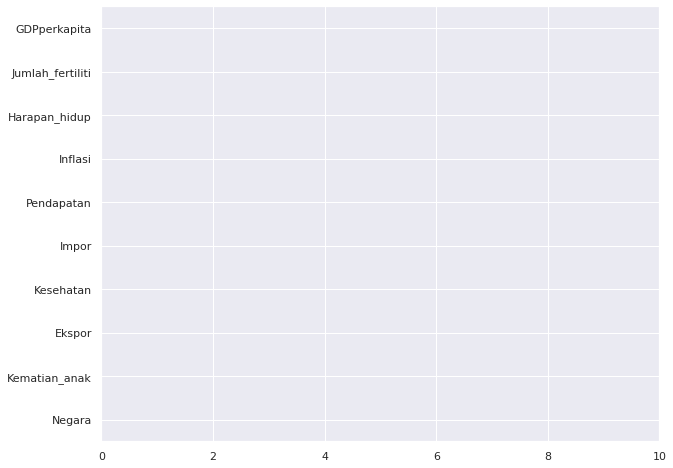

In [ ]:
#count numbers of missing value
missing_values = df.isnull().sum()

# figure missing values
fig,ax = plt.subplots(figsize=(10,8))
plt.xlim(0,10)
missing_values.plot(kind='barh', color='b')

Grafik diatas menunjukkan tidak adanya missing values dari setiap column di Dataframe

Check Outliers

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass t

<Figure size 576x360 with 0 Axes>

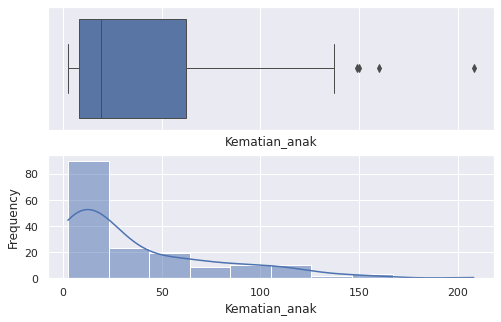

<Figure size 576x360 with 0 Axes>

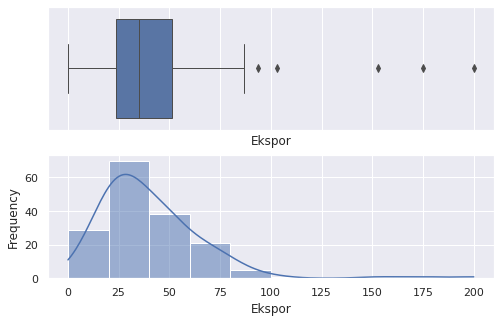

<Figure size 576x360 with 0 Axes>

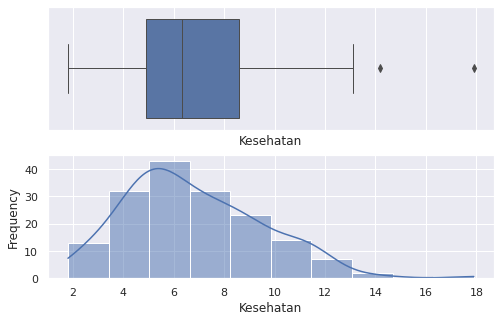

<Figure size 576x360 with 0 Axes>

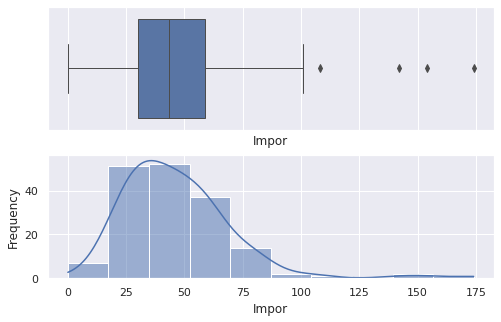

<Figure size 576x360 with 0 Axes>

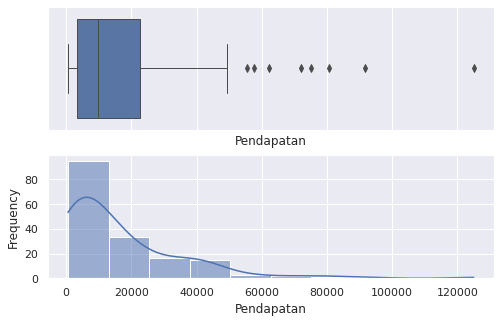

<Figure size 576x360 with 0 Axes>

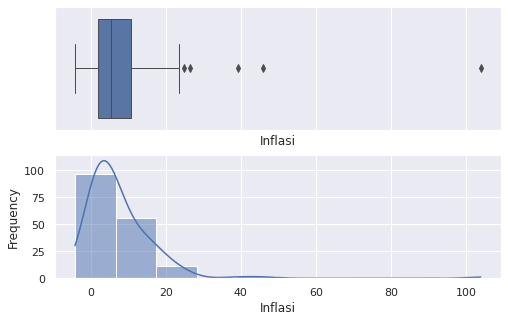

<Figure size 576x360 with 0 Axes>

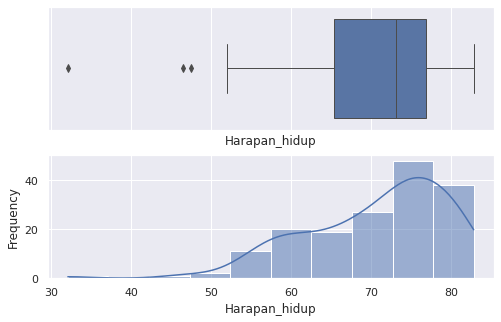

<Figure size 576x360 with 0 Axes>

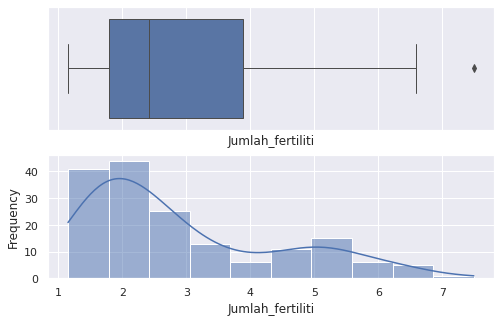

<Figure size 576x360 with 0 Axes>

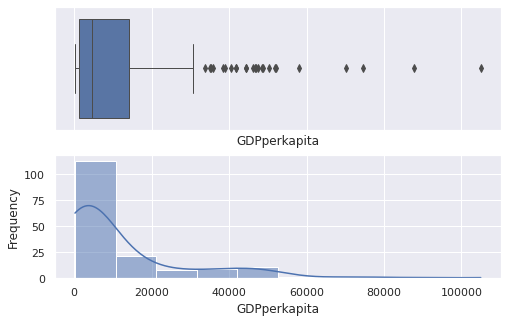

In [ ]:
for i in df.iloc[:,1:10].columns:
  plt.figure()
  plt.tight_layout()
  sns.set(rc={"figure.figsize":(8, 5)})
  f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
  plt.gca().set(xlabel= i,ylabel='Frequency')
  sns.boxplot(df[i], ax=ax_box , linewidth= 1.0)
  sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True)

Seperti dilihat dari Grafik diatas bahwa semua column dari dataset memiliki outliers dan jika dilihat hampir semua grafik menujukkan right skew dimana nilai mean nya lebih besar daripada nilai Q2 nya. 
Variabel GDPperkapita merupakan variabel dengan outliers terbanyak

Check nilai outlier masing-masing variabel

In [ ]:
# Handling outlier using methjod Interquartile range
def findoutlier (col_name): 
  q1 = df[col_name].describe()['25%']
  q3 = df[col_name].describe()['75%']
  iqr = q3-q1
  min = q1-(1.5*iqr)
  max = q3+(1.5*iqr)

# specify limit
  lowerlim = df[[col_name]] < min
  upperlim = df[[col_name]] > max

#check outliers
  outlier = df.loc[(df[col_name]<min) | (df[col_name]>max)]
  return outlier

# call function
for i in df.iloc[:,1:10].columns:
  display(i, findoutlier(i))

'Kematian_anak'

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446
32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399


'Ekspor'

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
73,Ireland,4.2,103.0,9.19,86.5,45700,-3.220,80.4,2.05,48700
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100
131,Seychelles,14.4,93.8,3.40,108.0,20400,-4.210,73.4,2.17,10800
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600


'Kesehatan'

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
101,"Micronesia, Fed. Sts.",40.0,23.5,14.2,81.0,3340,3.80,65.4,3.46,2860
159,United States,7.3,12.4,17.9,15.8,49400,1.22,78.7,1.93,48400


'Impor'

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100
131,Seychelles,14.4,93.8,3.40,108.0,20400,-4.210,73.4,2.17,10800
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600


'Pendapatan'

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300
82,Kuwait,10.8,66.7,2.63,30.4,75200,11.200,78.2,2.21,38500
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600
157,United Arab Emirates,8.6,77.7,3.66,63.6,57600,12.500,76.5,1.87,35000


'Inflasi'

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
49,Equatorial Guinea,111.0,85.8,4.48,58.9,33700,24.9,60.9,5.21,17100
103,Mongolia,26.1,46.7,5.44,56.7,7710,39.2,66.2,2.64,2650
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.0,60.5,5.84,2330
149,Timor-Leste,62.6,2.2,9.12,27.8,1850,26.5,71.1,6.23,3600
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.9,75.4,2.47,13500


'Harapan_hidup'

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662
87,Lesotho,99.7,39.4,11.10,101.0,2380,4.15,46.5,3.30,1170


'Jumlah_fertiliti'

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
112,Niger,123.0,22.2,5.16,49.1,814,2.55,58.8,7.49,348


'GDPperkapita'

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200
54,France,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600
58,Germany,4.2,42.3,11.60,37.1,40400,0.758,80.1,1.39,41800
68,Iceland,2.6,53.4,9.40,43.3,38800,5.470,82.0,2.20,41900


In [ ]:
for i in df.iloc[:,1:10].columns:
  jlh_outlier = findoutlier(i).value_counts().sum()
  jlh_outlier = print (i, jlh_outlier)

Kematian_anak 4
Ekspor 5
Kesehatan 2
Impor 4
Pendapatan 8
Inflasi 5
Harapan_hidup 3
Jumlah_fertiliti 1
GDPperkapita 25


In [ ]:
values = [4,5,2,4,8,5,3,1,25]
names = df.iloc[:,1:10].columns
px.pie(values=values, names=names, width=500, height=500, title='Persentase Jumlah outlier berdasarkan variabel')

Seperti dilihat pada dataframe diatas menununjukkan nilai outliers dari setiap variabel mulai dari Variabel Kematian anak sampai GDPperkapita

Handle Outlier


* Terlihat dari data diatas begitu banyak outlier, jika kita drop semua outlier 
dengan metode Interquartile (IQR) dari masing-masing variabel tentu akan mempengaruhi hasil analisa negara mana yang dipilih untuk menentukan Negara yang dibantu, serta kita hanya memiliki 167 baris data tentunya menghapus semua outlier tidak efektif.

* Selain itu jika kita tidak menghapus outlier dapat berdampak pada model kluster yang digunakan nanti, karena dapat mempengaruhi titik centroid dan jumlah kluster yang tepat

*   Untuk handle outlier diatas dapat dilakukan dengan metodei Percentile Capping (Winsorization) metode ini bertujuan untuk membatasi nilai extereme dari masing-masing variabel untuk mengurangi efek dari outlier pada analisa 
*   Pada ketentuan Winsorization ini nilai pada variabel yang kurang dari persentil 1 dan lebih dari persentil 99 akan diganti dengan masing-masing nilai persentil 1 dan 99









In [ ]:
# handle outlier dengan metode Winsorization pada masing-masing variabel
upper_gdpp = df['GDPperkapita'].quantile(0.99)
lower_gdpp = df['GDPperkapita'].quantile(0.01)
df['GDPperkapita'][df['GDPperkapita']>=upper_gdpp]=upper_gdpp
df['GDPperkapita'][df['GDPperkapita']<=lower_gdpp]=lower_gdpp

upper_mort = df['Kematian_anak'].quantile(0.99)
lower_mort = df['Kematian_anak'].quantile(0.01)
df['Kematian_anak'][df['Kematian_anak']>=upper_mort]=upper_mort
df['Kematian_anak'][df['Kematian_anak']<=lower_mort]=lower_mort

upper_exp = df['Ekspor'].quantile(0.99)
lower_exp = df['Ekspor'].quantile(0.01)
df['Ekspor'][df['Ekspor']>=upper_exp]=upper_exp
df['Ekspor'][df['Ekspor']<=lower_exp]=lower_exp

upper_kesehatan = df['Kesehatan'].quantile(0.99)
lower_kesehatan = df['Kesehatan'].quantile(0.01)
df['Kesehatan'][df['Kesehatan']>=upper_kesehatan]=upper_kesehatan
df['Kesehatan'][df['Kesehatan']<=lower_kesehatan]=lower_kesehatan

upper_import = df['Impor'].quantile(0.99)
lower_import = df['Impor'].quantile(0.01)
df['Impor'][df['Impor']>=upper_import]=upper_import
df['Impor'][df['Impor']<=lower_import]=lower_import

upper_income = df['Pendapatan'].quantile(0.99)
lower_income = df['Pendapatan'].quantile(0.01)
df['Pendapatan'][df['Pendapatan']>=upper_income]=upper_income
df['Pendapatan'][df['Pendapatan']<=lower_income]=lower_income

upper_inflasi = df['Inflasi'].quantile(0.99)
lower_inflasi = df['Inflasi'].quantile(0.01)
df['Inflasi'][df['Inflasi']>=upper_inflasi]=upper_inflasi
df['Inflasi'][df['Inflasi']<=lower_inflasi]=lower_inflasi

upper_harapanhidup = df['Harapan_hidup'].quantile(0.99)
lower_harapanhidup = df['Harapan_hidup'].quantile(0.01)
df['Harapan_hidup'][df['Harapan_hidup']>=upper_harapanhidup]=upper_harapanhidup
df['Harapan_hidup'][df['Harapan_hidup']<=lower_harapanhidup]=lower_harapanhidup

upper_fertiliti = df['Jumlah_fertiliti'].quantile(0.99)
lower_fertiliti = df['Jumlah_fertiliti'].quantile(0.01)
df['Jumlah_fertiliti'][df['Jumlah_fertiliti']>=upper_fertiliti]=upper_fertiliti
df['Jumlah_fertiliti'][df['Jumlah_fertiliti']<=lower_fertiliti]=lower_fertiliti

In [ ]:
#recheck again outlier
df.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,37.904790,40.818376,6.787614,46.760096,16858.601677,7.397332,70.645269,2.942896,12757.456527
std,39.026793,25.697471,2.642518,23.052216,17956.060832,7.770993,8.553975,1.497595,17429.755235
min,2.800000,3.909400,2.121800,12.988000,742.240000,-2.348800,47.160000,1.243200,331.620000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


seperti yang kita lihat diatas nilai max dan minimal dari variabel GDPperkapita dan Kematian_anak telah berubah sesuai nilai percentile 1 pada nilai minimal nya dan percentile 99 pada nilai maximal nya

Univariate analysis

In [ ]:
gdp_high = df[['Negara','GDPperkapita']].sort_values(by='GDPperkapita', ascending=False).reset_index(drop=True).head(10)
px.bar(gdp_high, x='Negara', y='GDPperkapita',text_auto='GDPperkapita', title = 'Total GDPperkapita Negara Tertinggi', color='Negara')               

In [ ]:
gdp_low = df[['Negara','GDPperkapita']].sort_values(by='GDPperkapita', ascending=True).reset_index(drop=True).head(10)
px.bar(gdp_low, x='Negara', y='GDPperkapita',text_auto='GDPperkapita', title = 'Total GDPperkapita Negara Terendah', color='Negara')

In [ ]:
kematian_high = df[['Negara','Kematian_anak','GDPperkapita']].sort_values(by='Kematian_anak', ascending=False).reset_index(drop=True).head(10)
px.bar(kematian_high, x='Negara', y='Kematian_anak',text='GDPperkapita', text_auto=True ,title = 'Total Kematian Anak Negara Tertinggi', color='Negara') 

Dari 10 negara dengan total kematian anak tertinggi ada 4 negara yang masuk dalam 10 negara dengan GDP terendah, artinya GDP perkapita cukup mempengaruhi nilai kematian anak

In [ ]:
kematian_low = df[['Negara','Kematian_anak','GDPperkapita']].sort_values(by='Kematian_anak', ascending=True).reset_index(drop=True).head(10)
px.bar(kematian_low, x='Negara', y='Kematian_anak',text='GDPperkapita',text_auto=True ,title = 'Total Kematian anak Negara Terendah', color='Negara')

Bivariate Analysis

Pada kasus ini kita fokus untuk analisa dengan menggunakan variabel GDP perkapita dan Kematian Anak

In [ ]:
px.scatter(data_frame=df, x='GDPperkapita',y='Kematian_anak', trendline='lowess',title='GDP perkapita vs Kematian anak')

# Clustering

In [ ]:
#  standarize data for scaling 
scaler = StandardScaler() # inisiasi 
df_scaled = scaler.fit_transform(df.iloc[:,1:10]) # fit dan transform data ke model df yang sudah di drop kolom negara nya
df_scaled = pd.DataFrame(df_scaled, columns=df.describe().columns) #masukkan data kedalam dataframe dan beri nama column
df_scaled

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,1.344012,-1.202883,0.300762,-0.080933,-0.851772,0.263649,-1.693799,1.926928,-0.702314
1,-0.547543,-0.500319,-0.090190,0.080055,-0.387025,-0.375251,0.663053,-0.865911,-0.498775
2,-0.272548,-0.094393,-0.993555,-0.668322,-0.221124,1.123260,0.686504,-0.035427,-0.477483
3,2.084186,0.838457,-1.494581,-0.167954,-0.612136,1.936405,-1.236499,2.154642,-0.531000
4,-0.709457,0.182730,-0.287564,0.528210,0.125202,-0.768917,0.721681,-0.544433,-0.032079
...,...,...,...,...,...,...,...,...,...
162,-0.223717,0.225665,-0.583625,0.258447,-0.776921,-0.616614,-0.896456,0.373118,-0.563226
163,-0.534693,-0.480803,-0.712677,-1.268763,-0.020031,4.398816,0.557522,-0.316720,0.042730
164,-0.375350,1.217062,0.019884,1.454978,-0.690898,0.606977,0.287833,-0.664988,-0.658752
165,0.472766,-0.422256,-0.610194,-0.537791,-0.691456,2.091290,-0.368803,1.156721,-0.658752


In [ ]:
dfscaled2 = df_scaled.loc[:,['Kematian_anak','GDPperkapita']]
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(dfscaled2)
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
ssddf = pd.DataFrame(ssd)
ssddf.columns = ['SSD']
fig = go.Figure(data=go.Scatter(x=ssddf.index, y=ssddf['SSD']))
fig.update_layout(height=500, width=800, title_text="SSD/Elbow Curve")
fig.show()

In [ ]:
data = []
k_list = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for k in range_n_clusters:
    kmeans = KMeans(n_clusters = k).fit(dfscaled2)
    labels = kmeans.labels_
    data.append(silhouette_score(dfscaled2, labels, metric = 'euclidean'))
    k_list.append(k)

px.line(x=k_list,y=data,markers=True, title='Check silhouette method to find suit numbers cluster')

Dari metode elbow dan silhouette diatas menunjukkan jumlah kluster 3 adalah jumlah yang tepat untuk menentukan jumlah kluster, sekarang kita coba visualisasikan grafiknya

In [ ]:
kmeans = KMeans(n_clusters=3 , random_state=40, algorithm='elkan').fit(dfscaled2) # make model and fit data into model
print(kmeans.labels_)
# add column labels 
dfscaled2['labels'] = kmeans.labels_
dfscaled2

[2 0 0 2 0 0 0 1 1 0 1 0 0 0 0 1 0 2 0 0 0 0 0 1 0 2 2 0 2 1 0 2 2 0 0 0 2
 2 2 0 2 0 1 0 1 0 0 0 0 2 0 0 0 1 1 2 2 0 1 2 1 0 0 2 2 0 2 0 1 2 0 0 0 1
 1 1 0 1 0 0 2 2 1 0 2 0 0 2 2 0 0 1 0 2 2 0 0 2 0 2 0 0 0 0 0 0 2 2 0 0 1
 1 2 2 1 0 2 0 0 0 0 0 0 1 0 0 2 0 0 2 0 0 2 1 0 0 0 0 0 1 0 0 2 0 1 1 0 2
 0 2 2 0 0 0 2 2 0 1 1 1 0 0 0 0 0 0 2]


,Kematian_anak,GDPperkapita,labels
0,1.344012,-0.702314,2
1,-0.547543,-0.498775,0
2,-0.272548,-0.477483,0
3,2.084186,-0.531000,2
4,-0.709457,-0.032079,0
...,...,...,...
162,-0.223717,-0.563226,0
163,-0.534693,0.042730,0
164,-0.375350,-0.658752,0
165,0.472766,-0.658752,0


In [ ]:
labels_3 = dfscaled2[['labels']].value_counts()
labels_3 = pd.DataFrame(labels_3, columns=['Jumlah']).reset_index()
labels_3.columns
px.pie(labels_3, values='Jumlah', names='labels', width=500, height=500, title='Persentase Jumlah Negara dengan Kluster = 3')

ncluster=3


Text(0, 0.5, 'Kematian anak')

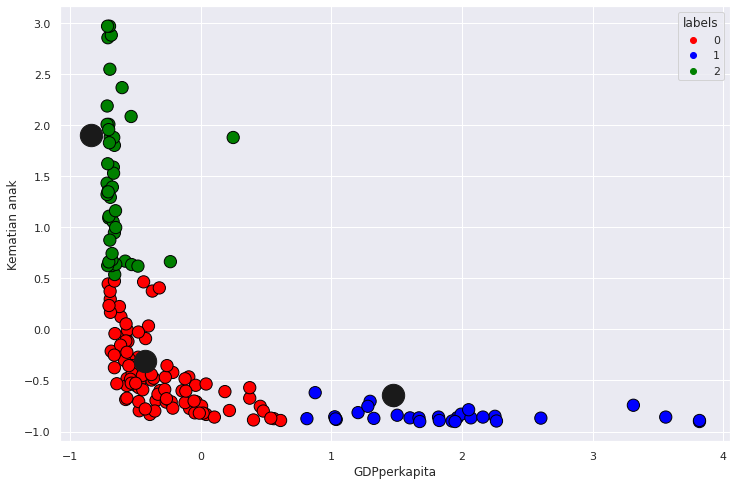

In [ ]:
#visualize
fig, ax = plt.subplots(figsize=(12,8))
#plt.xlim([-2, 2.5])  

color_dict = { 0:'red',
               1:'blue',
               2:'green'
              }
# plot scatter data       
print('ncluster=3')       
sns.scatterplot(x=dfscaled2['GDPperkapita'][dfscaled2.labels==0], y=dfscaled2['Kematian_anak'][dfscaled2.labels==0],hue=dfscaled2.labels[(dfscaled2.labels==0)] , s=150, palette=color_dict, edgecolor='black')
sns.scatterplot(x=dfscaled2['GDPperkapita'][dfscaled2.labels==1], y=dfscaled2['Kematian_anak'][dfscaled2.labels==1],hue=dfscaled2.labels[(dfscaled2.labels==1)] , s=150, palette=color_dict, edgecolor='black')
sns.scatterplot(x=dfscaled2['GDPperkapita'][dfscaled2.labels==2], y=dfscaled2['Kematian_anak'][dfscaled2.labels==2],hue=dfscaled2.labels[(dfscaled2.labels==2)] , s=150, palette=color_dict, edgecolor='black')

#plot centroid
centers = kmeans.cluster_centers_
plt.scatter(x=centers[:,0] , y=centers[:,1] , s = 500, color = 'k', edgecolor=None)
plt.legend(title='labels')

ax.set_xlabel('GDPperkapita')
ax.set_ylabel('Kematian anak')

In [ ]:
dfscaled2[['Negara']]=df[['Negara']]
dfscaled2
firstcol=dfscaled2.pop('Negara')
dfscaled2.insert(0,'Negara',firstcol)
dfscaled2.loc[dfscaled2['labels']==2].sort_values(['Kematian_anak','GDPperkapita'], ascending=[False,True]).head(10)

,Negara,Kematian_anak,GDPperkapita,labels
132,Sierra Leone,2.968283,-0.711176,2
66,Haiti,2.968283,-0.696042,2
32,Chad,2.880901,-0.682518,2
31,Central African Republic,2.855201,-0.708471,2
97,Mali,2.546795,-0.693394,2
113,Nigeria,2.366892,-0.600055,2
112,Niger,2.186988,-0.714111,2
3,Angola,2.084186,-0.531000,2
37,"Congo, Dem. Rep.",2.007085,-0.714917,2
25,Burkina Faso,2.007085,-0.701048,2


In [ ]:
dfscale3 = df_scaled.loc[:,['Kematian_anak','GDPperkapita']]
kmeans2 = KMeans(n_clusters=4 , random_state=40, algorithm='elkan').fit(dfscale3) # make model and fit data into model
print(kmeans2.labels_)
# add column labels 
dfscale3['labels'] = kmeans2.labels_
dfscale3

[1 0 0 1 0 0 0 2 2 3 0 0 3 0 0 2 0 1 3 3 0 3 0 2 0 1 1 3 1 2 0 1 1 0 0 0 1
 1 3 0 1 0 2 0 2 0 0 0 0 1 3 0 0 2 2 3 3 0 2 3 0 0 3 1 1 3 1 0 2 3 0 0 3 2
 2 2 0 2 0 0 3 3 2 0 3 0 0 1 1 0 0 2 0 3 1 0 0 1 0 1 0 3 0 0 0 0 1 3 3 3 2
 2 1 1 2 0 1 0 0 0 0 0 0 2 0 0 3 0 0 3 0 0 1 2 0 0 0 3 0 2 0 0 3 0 2 2 3 3
 0 3 1 0 0 0 3 3 0 2 2 2 0 3 0 0 0 3 3]


,Kematian_anak,GDPperkapita,labels
0,1.344012,-0.702314,1
1,-0.547543,-0.498775,0
2,-0.272548,-0.477483,0
3,2.084186,-0.531000,1
4,-0.709457,-0.032079,0
...,...,...,...
162,-0.223717,-0.563226,0
163,-0.534693,0.042730,0
164,-0.375350,-0.658752,0
165,0.472766,-0.658752,3


In [ ]:
labels_4 = dfscale3[['labels']].value_counts()
labels_4 = pd.DataFrame(labels_4, columns=['Jumlah']).reset_index()
px.pie(labels_4, values='Jumlah', names='labels', width=500, height=500, title='Persentase Jumlah Negara dengan Kluster = 4')

ncluster=4


Text(0, 0.5, 'Kematian anak')

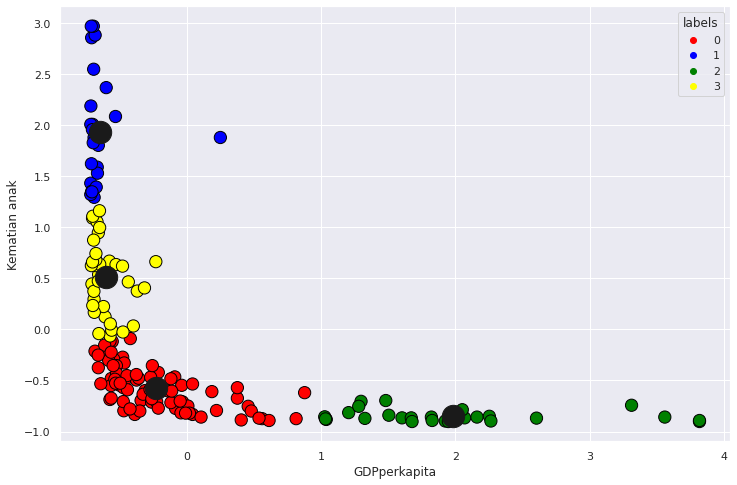

In [ ]:
#visualize
fig, ax = plt.subplots(figsize=(12,8))
#plt.xlim([-2, 2.5])  

color_dict = { 0:'red',
               1:'blue',
               2:'green',
               3:'yellow'
              }
# plot scatter data       
print('ncluster=4')       
sns.scatterplot(x=dfscale3['GDPperkapita'][dfscale3.labels==0], y=dfscale3['Kematian_anak'][dfscale3.labels==0],hue=dfscale3.labels[(dfscale3.labels==0)] , s=150, palette=color_dict, edgecolor='black')
sns.scatterplot(x=dfscale3['GDPperkapita'][dfscale3.labels==1], y=dfscale3['Kematian_anak'][dfscale3.labels==1],hue=dfscale3.labels[(dfscale3.labels==1)] , s=150, palette=color_dict, edgecolor='black')
sns.scatterplot(x=dfscale3['GDPperkapita'][dfscale3.labels==2], y=dfscale3['Kematian_anak'][dfscale3.labels==2],hue=dfscale3.labels[(dfscale3.labels==2)] , s=150, palette=color_dict, edgecolor='black')
sns.scatterplot(x=dfscale3['GDPperkapita'][dfscale3.labels==3], y=dfscale3['Kematian_anak'][dfscale3.labels==3],hue=dfscale3.labels[(dfscale3.labels==3)] , s=150, palette=color_dict, edgecolor='black')

#plot centroid
centers = kmeans2.cluster_centers_
plt.scatter(x=centers[:,1] , y=centers[:,0] , s = 500, color = 'k', edgecolor=None)
plt.legend(title='labels')

ax.set_xlabel('GDPperkapita')
ax.set_ylabel('Kematian anak')

# Recommendation

In [ ]:
dfscale3[['Negara']]=df[['Negara']]
firstcol=dfscale3.pop('Negara')
dfscale3.insert(0,'Negara',firstcol)
dfscale3
help_countries=dfscale3.loc[dfscale3['labels']==1].sort_values(['Kematian_anak','GDPperkapita'], ascending=[False,True]).head(10)
help_countries

,Negara,Kematian_anak,GDPperkapita,labels
132,Sierra Leone,2.968283,-0.711176,1
66,Haiti,2.968283,-0.696042,1
32,Chad,2.880901,-0.682518,1
31,Central African Republic,2.855201,-0.708471,1
97,Mali,2.546795,-0.693394,1
113,Nigeria,2.366892,-0.600055,1
112,Niger,2.186988,-0.714111,1
3,Angola,2.084186,-0.531000,1
37,"Congo, Dem. Rep.",2.007085,-0.714917,1
25,Burkina Faso,2.007085,-0.701048,1


In [ ]:
help_countries.Negara

132                Sierra Leone
66                        Haiti
32                         Chad
31     Central African Republic
97                         Mali
113                     Nigeria
112                       Niger
3                        Angola
37             Congo, Dem. Rep.
25                 Burkina Faso
Name: Negara, dtype: object

Dari hasil kluster dengan KMeans diperoleh Negara dengan label 1 (biru) dengan GDP perkapita rendah dan angka kematian anak yang tinggi. berikut 10 negara yang berhak mendapatkan bantuan dari HELP International Organization dengan fokus pada variabel tingkat GDP perkapita dan tingkat kematian anak :

*   Sierra Leone
*   Haiti
*   Chad
*   Central African Republic
*   Mali
*    Nigeria
*   Niger
*   Angola
*   Congo, Dem. Rep.
*   Burkina Faso

Reason :
*   Angka kematian anak tinggi
*   Tingkat GDP perkapita rendah
*   Pendapatan rendah
*   Angka Jumlah Fertili tinggi
*   Inflasi tinggi









Cek variabel lain dari Negara yang terpilih untuk mendapatkan bantuan

In [ ]:
df.filter(items=[132,66,32,31,97,113,112,3,37,25], axis=0)

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
132,Sierra Leone,153.4,16.8,13.10,34.5,1220.00,17.200,55.00,5.2000,399.0
66,Haiti,153.4,15.3,6.91,64.7,1500.00,5.450,47.16,3.3300,662.0
32,Chad,150.0,36.8,4.53,43.5,1930.00,6.390,56.50,6.5636,897.0
31,Central African Republic,149.0,11.8,3.98,26.5,888.00,2.010,47.50,5.2100,446.0
97,Mali,137.0,22.8,4.98,35.1,1870.00,4.370,59.50,6.5500,708.0
113,Nigeria,130.0,25.3,5.07,17.4,5150.00,41.478,60.50,5.8400,2330.0
112,Niger,123.0,22.2,5.16,49.1,814.00,2.550,58.80,6.5636,348.0
3,Angola,119.0,62.3,2.85,42.9,5900.00,22.400,60.10,6.1600,3530.0
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,742.24,20.800,57.50,6.5400,334.0
25,Burkina Faso,116.0,19.2,6.74,29.6,1430.00,6.810,57.90,5.8700,575.0


In [ ]:
df.filter(items=[132,66,32,31,97,113,112,3,37,25], axis=0).describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,10.000000,10.00000,10.00000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000
mean,134.680000,27.36000,6.12300,39.290000,2144.424000,12.945800,56.046000,5.78272,1022.900000
std,15.804697,15.33342,2.86855,13.565106,1836.485693,12.566611,4.883469,1.01206,1058.934207
min,116.000000,11.80000,2.85000,17.400000,742.240000,2.010000,47.160000,3.33000,334.000000
25%,120.000000,17.40000,4.64250,30.825000,971.000000,4.640000,55.375000,5.36750,410.750000
50%,133.500000,22.50000,5.11500,39.000000,1465.000000,6.600000,57.700000,6.01500,618.500000
75%,149.750000,33.92500,6.86750,47.700000,1915.000000,19.900000,59.325000,6.54750,849.750000
max,153.400000,62.30000,13.10000,64.700000,5900.000000,41.478000,60.500000,6.56360,3530.000000
